In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pywt 

# 데이터 입력

(9173, 8)
0       1226.693300
1       1226.704436
2       1226.715693
3       1226.727068
4       1226.738561
           ...     
9168    1220.769020
9169    1220.772835
9170    1220.776654
9171    1220.780477
9172    1220.784305
Name: 4, Length: 9173, dtype: float64


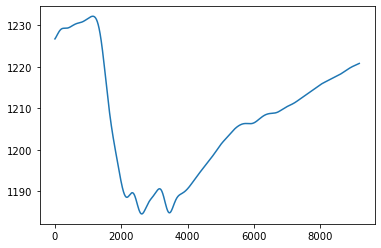

In [44]:
raw_data = pd.read_csv('./Sensor_Data/GSR_30s_Sliced_Sub2/sliced_FS2e1.csv', sep=',', header=None)
print(raw_data.shape)
print(raw_data.iloc[:,4])  #GSR Raw data 표시 (확인용)
plt.plot(raw_data.iloc[:,4])  # GSR RAW data 그래프 표현

In [45]:
mother_wavelet = pywt.Wavelet('db3')
decomp_level_ten = 10
decomp_level_eight = 8
decomp_level_six = 6
coeffs_ten = pywt.wavedec(raw_data.iloc[:,4], mother_wavelet, level=decomp_level_ten) 
coeffs_eight = pywt.wavedec(raw_data.iloc[:,4],mother_wavelet, level = decomp_level_eight)
coeffs_six = pywt.wavedec(raw_data.iloc[:,4],mother_wavelet, level=decomp_level_six)
plt.figure(figsize=(15,20))

<Figure size 1080x1440 with 0 Axes>

<Figure size 1080x1440 with 0 Axes>

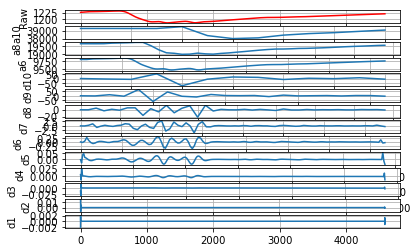

In [51]:
plt.subplot(decomp_level_ten+4, 1, 1)
plt.plot(raw_data.iloc[:, 4], color = 'r')
plt.ylabel('Raw')
plt.grid()

plt.subplot(decomp_level_ten+4, 1, 2)
plt.plot(coeffs_ten[0])
plt.ylabel('a10')
plt.grid()

plt.subplot(decomp_level_ten+4, 1, 3)
plt.plot(coeffs_eight[0])
plt.ylabel('a8')
plt.grid()

plt.subplot(decomp_level_ten+4, 1, 4)
plt.plot(coeffs_six[0])
plt.ylabel('a6')
plt.grid()

for k in range(1, decomp_level_ten+1):
    plt.subplot(decomp_level_ten+4, 1, k+4)
    plt.plot(coeffs_ten[k])
    plt.ylabel('d%d'%(decomp_level_ten+1-k))
    plt.grid()

Coefficient를 List -> Pandas Data Type 로 변환 

In [66]:
print(coeffs_ten[0].size)    # A10 
print(coeffs_eight[0].size)  # A8
print(coeffs_six[0].size)    # A6

13
40
148
